In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('sample_data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
s = len(dataset.columns)

In [5]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
# We can use Linear, Logistic, KNN, K means

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
### Creating ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [13]:
classifier = Sequential()

In [14]:
# input layers

classifier.add(Dense(units=11,activation='relu'))

In [15]:
#adding 1st hidden layer

classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [16]:
#adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [17]:
# output layer
classifier.add(Dense(1,activation='sigmoid'))

In [18]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [19]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3544 - accuracy: 0.8539 - val_loss: 0.3688 - val_accuracy: 0.8477
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3544 - accuracy: 0.8531 - val_loss: 0.3664 - val_accuracy: 0.8503
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3534 - accuracy: 0.8558 - val_loss: 0.3816 - val_accuracy: 0.8460
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3513 - accuracy: 0.8573 - val_loss: 0.3729 - val_accuracy: 0.8481
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3502 - accuracy: 0.8546 - val_loss: 0.3778 - val_accuracy: 0.8477
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3534 - accuracy: 0.8571 - val_loss: 0.3735 - val_accuracy: 0.8442
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3502 - accuracy: 0.8603 - val_loss: 0.3777 - val_accuracy: 0.8382

KeyboardInterrupt: ignored

In [20]:
import tensorflow as tf

In [21]:
# Early Stopping 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
469/469 [==============================] - 6s 5ms/step - loss: 0.4848 - accuracy: 0.7925 - val_loss: 0.4852 - val_accuracy: 0.7962
Epoch 2/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.4455 - accuracy: 0.8055 - val_loss: 0.4259 - val_accuracy: 0.8096
Epoch 3/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.4273 - accuracy: 0.8130 - val_loss: 0.4028 - val_accuracy: 0.8161
Epoch 4/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.4261 - accuracy: 0.8147 - val_loss: 0.4016 - val_accuracy: 0.8196
Epoch 5/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.4119 - accuracy: 0.8155 - val_loss: 0.4041 - val_accuracy: 0.8191
Epoch 6/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.4138 - accuracy: 0.8170 - val_loss: 0.3958 - val_accuracy: 0.8191
Epoch 7/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.4070 - accuracy: 0.8196 - val_loss: 0.3918 - val_accuracy:

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

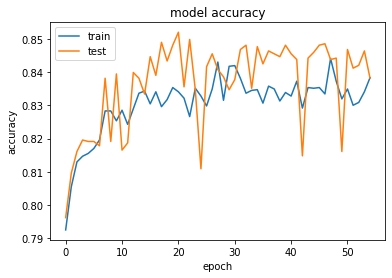

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

94/94 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[2199,  180],
       [ 286,  335]])

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8446666666666667

In [28]:
# get the weights
# storing the weights

classifier.get_weights()

[array([[-0.19674133, -0.04435978,  0.38207436,  0.31796604, -0.00620071,
         -0.01033486, -1.3137792 , -0.20076858,  0.09547625,  0.4352283 ,
         -0.39488724],
        [-1.2282968 ,  1.8075883 , -3.4827492 ,  0.22015063,  0.20729776,
         -0.5772825 , -1.3747594 , -1.4971666 , -3.1589334 , -0.8027929 ,
         -1.4166405 ],
        [-0.20255663,  0.27247524,  0.4431136 ,  0.9009698 , -0.10025998,
         -0.01863534, -0.6620145 ,  0.47450918,  0.35749972,  0.17883131,
          0.05698037],
        [ 0.01668482,  0.10053292,  0.16071615,  0.78644   , -0.12965052,
         -0.06072059,  0.10699485, -0.58942145, -0.9529455 , -2.3305228 ,
         -2.2875304 ],
        [ 2.4732585 ,  0.84060276, -0.34746152,  1.6528245 ,  3.4358044 ,
          0.0327626 , -0.02284308,  1.0824813 ,  0.9990782 ,  2.5095294 ,
          1.1645162 ],
        [-0.03247505, -0.21055569,  0.1379979 , -0.3080283 , -0.12753102,
         -0.03158622, -0.66187763, -0.81128955, -0.9144206 ,  0.1273905